In [ ]:
!nvidia-smi

Sun Dec 12 07:10:59 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    25W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In this homework, we will design a neural network for spiral dataset

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset
# Check Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device,torch.cuda.is_available())

cuda True


Make sure you already change device to GPU (runtime -> change runtime type)

In [ ]:
import math, random, numpy as np

def spiral_xy(i, spiral_num):
    """
    Create the data for a spiral.

    Arguments:
        
        spiral_num is 1 or -1
    """
    φ = i/16 * math.pi
    r = 6.5 * ((104 - i)/104)
    x = (r * math.cos(0.01*φ) * spiral_num)/13 + 0.5 + random.uniform(0, 3)
    y = (r * math.sin(0.01*φ) * spiral_num)/13 + 0.5 +  random.uniform(0, 3)
    return np.array([x, y])

def spiral(spiral_num):
    target_array = np.array([spiral_xy(i, spiral_num) for i in range(10000)])
    return target_array

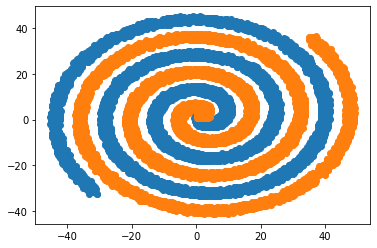

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
x_a = spiral(1)
x_b = spiral(-1)
#print(np.array(x_a))
plt.scatter(x_a[:, 0],x_a[:,1])
plt.scatter(x_b[:,0],x_b[:,1])
plt.show()

This is what spiral dataset looks like

In [ ]:
class SpiralDataset(Dataset):
    def __init__(self, X_a, X_b):
        self.coor_list =[]
        self.label_list = []
        self.transform = transforms.Compose([transforms.ToTensor()])
        for i in range(X_a.shape[0]):
            self.coor_list.append(X_a[i])
            self.label_list.append(0)
        
        for i in range(X_b.shape[0]):
            self.coor_list.append(X_b[i])
            self.label_list.append(1)
        

    def __len__(self):
        return len(self.label_list)

    def __getitem__(self, idx):
        coor = self.coor_list[idx]
        label = self.label_list[idx]
        coor = torch.from_numpy(coor).float() #self.transform(coor) 
        return coor, label

Now we write down the code for pytorch datasets.

In [ ]:
train_a = spiral(1)
train_b = spiral(-1)
test_a = spiral(1)
test_b = spiral(-1)
train_dataset = SpiralDataset(train_a,train_b)
test_dataset = SpiralDataset(test_a,test_b)

Home work:  following mnist_fcn.ipynb, design a neural network to train and test on SpiralDataset. What is the best accuracy you get? (The reasonable accuracy shall be greater than 98%) And what is the correspoding network architecture? 